<a href="https://colab.research.google.com/github/abrange/mit-deeplearning/blob/main/module_3/Deep_Learning_Mastering_Neural_Networks_Module_3_Introduction_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 3: Introduction to PyTorch**

## Introduction
[Pytorch](https://pytorch.org/) is an optimized tensor library for deep learning using GPUs and CPUs. Tensors are a specialized data structure that are very similar to arrays and matrices. Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. The ability to leverage GPUs for model training provides faster and more efficient computations than what CPUs provide. Additionally, tensors have some incredible powerful gradient calculation built in which greatly simplifies your code.

In this notebook we will give a brief introduction to using Pytorch and tensors to better prepare us for using them for Deep Learning in subsequent notebooks.

## Tensors

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Tensor created directly from a list. The data type is automatically inferred.

In [2]:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
tensor_data = torch.tensor(data)
print(tensor_data)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


Tensor created from a NumPy array.

In [3]:
np_array = np.array(data)
tensor_np = torch.from_numpy(np_array)
print(tensor_np)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


New tensors can be created from other tensors. The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [4]:
x_zeros = torch.zeros_like(tensor_data) # retains the properties of tensor_data
print(f"Zeros Tensor: \n {x_zeros} \n")

x_ones = torch.ones_like(tensor_data) # retains the properties of tensor_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(tensor_data, dtype=torch.float) # overrides the datatype of tensor_data
print(f"Random Tensor: \n {x_rand} \n")

Zeros Tensor: 
 tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) 

Ones Tensor: 
 tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]) 

Random Tensor: 
 tensor([[0.6734, 0.5066, 0.4177],
        [0.0651, 0.1114, 0.3495],
        [0.5846, 0.8685, 0.4607]]) 



Tensor can also be created from random or constant values.
In the functions below, we pass in a tuple, shape, which specifies the dimension of the output tensor.

In [5]:
shape = (3, 2,)
zeros_tensor = torch.zeros(shape)
ones_tensor = torch.ones(shape)
rand_tensor = torch.rand(shape)


print(f"Zeros Tensor: \n {zeros_tensor}")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Random Tensor: \n {rand_tensor} \n")

Zeros Tensor: 
 tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
Ones Tensor: 
 tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) 

Random Tensor: 
 tensor([[0.9810, 0.7585],
        [0.1663, 0.7081],
        [0.6784, 0.8167]]) 



Along with displaying the values of the tensor like we have above, we can print out additional attributes of the tensor which will be helpful for using it. We've seen the concepts of *shape* and *datatype* in previous notebooks, and now we will introduce a new concept known as *device*. ***Device*** in this context specifies where calculations are run. Typically, CPUs (central processing unit) are used by default as it's essentially the brain of any computing device, carrying out the instructions of a program by performing control, logical, and input/output (I/O) operations. GPUs (graphical processing unit) have smaller-sized but many more logical cores (arithmetic logic units or ALUs, control units and memory cache) whose basic design is to process a set of simpler and more identical computations in parallel.   

In [6]:
print(f"Shape of tensor: {rand_tensor.shape}")
print(f"Datatype of tensor: {rand_tensor.dtype}")
print(f"Device tensor is stored on: {rand_tensor.device}")

Shape of tensor: torch.Size([3, 2])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


GPUs usually perform machine learning tasks quicker and more efficiently than CPUs, so we prefer using them whenever we're able to.
Nvidia created a parallel computing architecture and platform for its GPUs called CUDA, which gave developers access and the ability to express simple processing operations in parallel through code. The rand_tensor is currently stored on CPU. If you’re using Colab, allocate a GPU by going to Edit > Notebook Settings. The below code will switch the device used from CPU to GPU if available.

In [7]:
if torch.cuda.is_available():
  tensor = rand_tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

## Gradients

The below example is pulled from: https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:

In [8]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

print("loss:", loss)

loss: tensor(2.1646, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


A function that we apply to tensors to construct computational graph is in fact an object of class Function. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in grad_fn property of a tensor. You can find more information of Function in the documentation.

In [9]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x10651c9d0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x137c4ae90>


To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, namely, we need $\frac{\partial loss}{\partial w}$
  and $\frac{\partial loss}{\partial b}$
  under some fixed values of x and y. To compute those derivatives, we call loss.backward(), and then retrieve the values from w.grad and b.grad:

In [10]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3194, 0.0146, 0.3207],
        [0.3194, 0.0146, 0.3207],
        [0.3194, 0.0146, 0.3207],
        [0.3194, 0.0146, 0.3207],
        [0.3194, 0.0146, 0.3207]])
tensor([0.3194, 0.0146, 0.3207])


## Optimization

By using the auto-differentiation powers of PyTorch, we can easily perform the optimization tasks necessary for training large neural networks. In the code snippet below, we plot a function and its corresponding derivative to visualize this.

Our goal in deep learning is to minimize our loss function, and by looking at this simple plot we can see how the derivative can inform us of the minimum value of a given function.

*Note the use of .detach.numpy() to get a value back from the tensor and device, into a numpy array, for plotting.

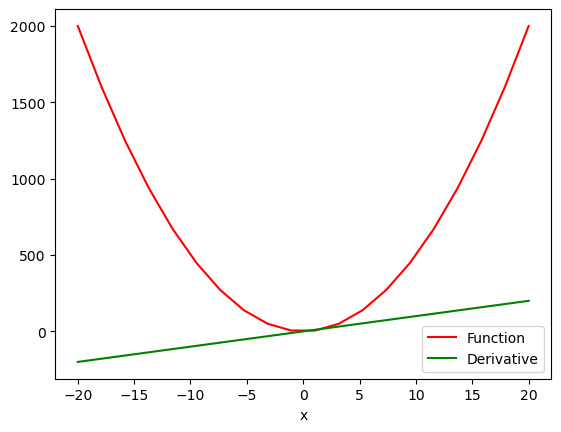

In [11]:
# compute the derivative of the function with multiple values
x = torch.linspace(-20, 20, 20, requires_grad = True)
Y = 5*x ** 2
y = torch.sum(Y)
y.backward()

# ploting the function and derivative
function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'Derivative')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()

## Looking Ahead

As we have seen, tensors can be extremely powerful and can greatly simplify the implementation of our programs. We will build on this auto-gradient framework and apply it to more complex neural networks in the following modules. If you would like more information on Tensors and Pytorch as a whole, make sure to check out their tutorial and docs which can be found [here](https://pytorch.org/tutorials/beginner/basics/intro.html).